<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/Updated_Tree_Based_Models_and_Their_Performance_for_Auto_Credit_Default_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values after imputation: 0
Decision Tree Accuracy: 0.8877810602330544

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94     22425
         1.0       0.32      0.35      0.33      1947

    accuracy                           0.89     24372
   macro avg       0.63      0.64      0.64     24372
weighted avg       0.89      0.89      0.89     24372



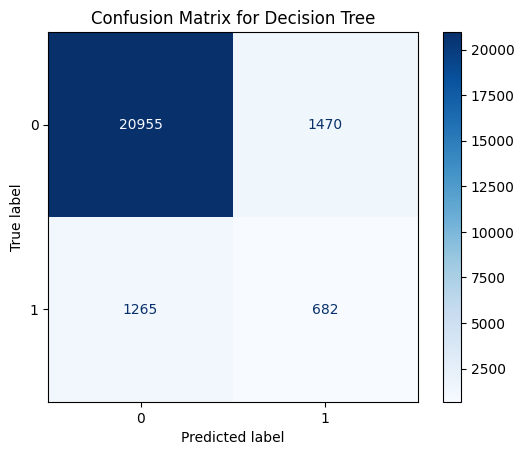

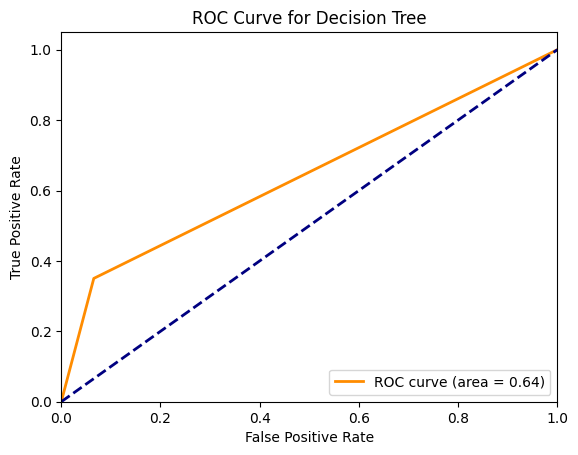

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10; total time=   1.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10; total time=   1.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10; total time=   1.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10; total time=   1.3s
[CV] END criterion=entropy, max_depth=7, 

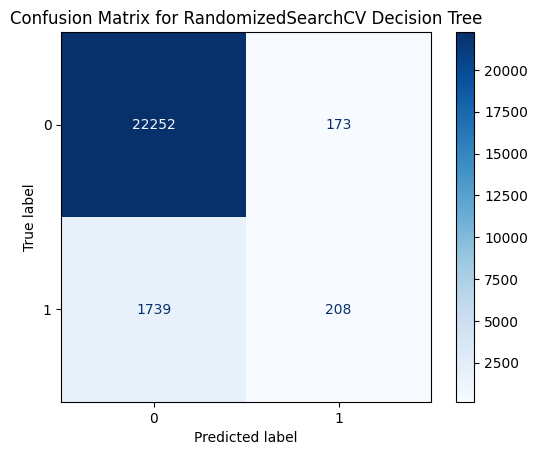

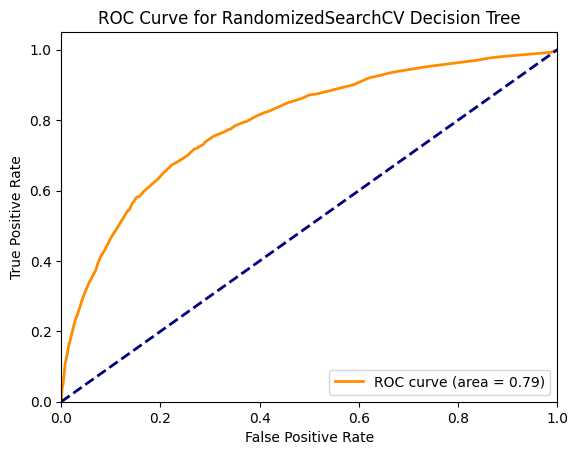

Random Forest Accuracy: 0.9280321680617102

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     22425
         1.0       0.93      0.11      0.19      1947

    accuracy                           0.93     24372
   macro avg       0.93      0.55      0.58     24372
weighted avg       0.93      0.93      0.90     24372



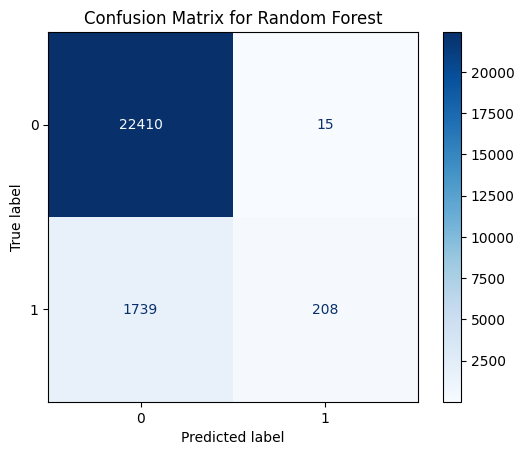

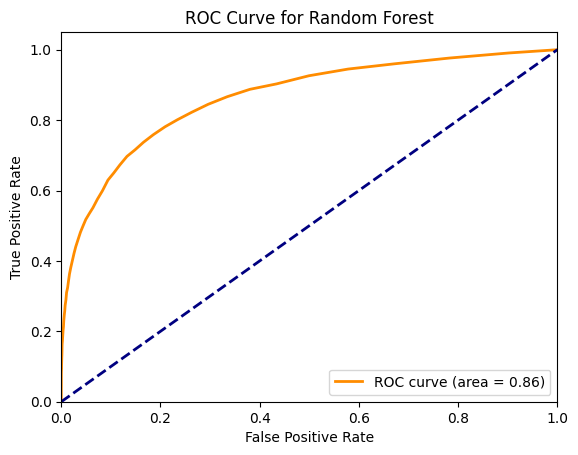

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   4.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   4.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   4.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   4.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   4.7s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] 

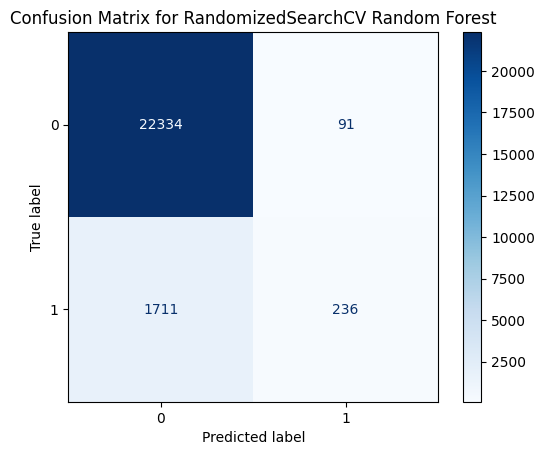

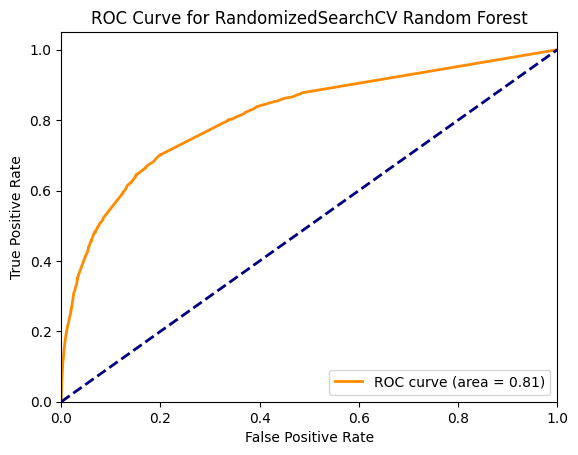


Decision Tree Performance:
Accuracy: 0.8877810602330544
Precision: N/A
Recall: N/A
F1 Score: N/A

RandomizedSearchCV Decision Tree Performance:
Accuracy: 0.9215493188905302
Precision: N/A
Recall: N/A
F1 Score: N/A

Random Forest Performance:
Accuracy: 0.9280321680617102
Precision: N/A
Recall: N/A
F1 Score: N/A

RandomizedSearchCV Random Forest Performance:
Accuracy: 0.9260626948957821
Precision: N/A
Recall: N/A
F1 Score: N/A


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Optimize memory usage
def optimize_memory_usage(df):
    for col in df.select_dtypes(include=['float']):
        df[col] = pd.to_numeric(df[col], downcast='float', errors='coerce')
    for col in df.select_dtypes(include=['int']):
        df[col] = pd.to_numeric(df[col], downcast='integer', errors='coerce')
    for col in df.select_dtypes(include=['object']):
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Clean data sets
def clean_data(df):
    df = df.replace('x', '', regex=True)
    return df

# Encode categorical columns
def encode_categorical_columns(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        try:
            df[col] = le.fit_transform(df[col])
        except:
            df[col] = df[col].astype('category').cat.codes
    return df

# Drop columns with all NaN values and handle missing data with iterative imputation
def drop_and_impute(df):
    df = df.dropna(axis=1, how='all')
    imputer = IterativeImputer()
    imputed_array = imputer.fit_transform(df)
    imputed_df = pd.DataFrame(imputed_array, columns=df.columns)
    print(f"Missing values after imputation: {imputed_df.isna().sum().sum()}")
    return imputed_df

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot ROC curve
def plot_roc_curve(fpr, tpr, auc_score, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Decision Tree and Random Forest comparison
def model_comparison(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = {}

    try:
        # Basic Decision Tree
        dt = DecisionTreeClassifier(random_state=42)
        dt.fit(X_train, y_train)
        y_pred_dt = dt.predict(X_test)
        accuracy_dt = accuracy_score(y_test, y_pred_dt)
        report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
        fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
        auc_dt = auc(fpr_dt, tpr_dt)
        results['Decision Tree'] = {
            'Accuracy': accuracy_dt,
            'Precision': report_dt['1']['precision'] if '1' in report_dt else 'N/A',
            'Recall': report_dt['1']['recall'] if '1' in report_dt else 'N/A',
            'F1 Score': report_dt['1']['f1-score'] if '1' in report_dt else 'N/A'
        }
        print("Decision Tree Accuracy:", accuracy_dt)
        print("\nClassification Report for Decision Tree:")
        print(classification_report(y_test, y_pred_dt))

        plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree')
        plot_roc_curve(fpr_dt, tpr_dt, auc_dt, 'Decision Tree')

        # Randomized Search CV for Decision Tree
        param_dist_dt = {
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
        rand_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist_dt, n_iter=10, cv=5, random_state=42, n_jobs=1, verbose=2)
        rand_search_dt.fit(X_train, y_train)
        y_pred_rand_dt = rand_search_dt.predict(X_test)
        accuracy_rand_dt = accuracy_score(y_test, y_pred_rand_dt)
        report_rand_dt = classification_report(y_test, y_pred_rand_dt, output_dict=True)
        fpr_rand_dt, tpr_rand_dt, _ = roc_curve(y_test, rand_search_dt.predict_proba(X_test)[:, 1])
        auc_rand_dt = auc(fpr_rand_dt, tpr_rand_dt)
        results['RandomizedSearchCV Decision Tree'] = {
            'Accuracy': accuracy_rand_dt,
            'Precision': report_rand_dt['1']['precision'] if '1' in report_rand_dt else 'N/A',
            'Recall': report_rand_dt['1']['recall'] if '1' in report_rand_dt else 'N/A',
            'F1 Score': report_rand_dt['1']['f1-score'] if '1' in report_rand_dt else 'N/A'
        }
        print("Randomized Search CV Decision Tree Accuracy:", accuracy_rand_dt)
        print("\nClassification Report for Randomized Search CV Decision Tree:")
        print(classification_report(y_test, y_pred_rand_dt))

        plot_confusion_matrix(y_test, y_pred_rand_dt, 'RandomizedSearchCV Decision Tree')
        plot_roc_curve(fpr_rand_dt, tpr_rand_dt, auc_rand_dt, 'RandomizedSearchCV Decision Tree')

        # Basic Random Forest
        rf = RandomForestClassifier(random_state=42, n_jobs=1)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
        fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
        auc_rf = auc(fpr_rf, tpr_rf)
        results['Random Forest'] = {
            'Accuracy': accuracy_rf,
            'Precision': report_rf['1']['precision'] if '1' in report_rf else 'N/A',
            'Recall': report_rf['1']['recall'] if '1' in report_rf else 'N/A',
            'F1 Score': report_rf['1']['f1-score'] if '1' in report_rf else 'N/A'
        }
        print("Random Forest Accuracy:", accuracy_rf)
        print("\nClassification Report for Random Forest:")
        print(classification_report(y_test, y_pred_rf))

        plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
        plot_roc_curve(fpr_rf, tpr_rf, auc_rf, 'Random Forest')

        # Randomized Search CV for Random Forest
        param_dist_rf = {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
        rand_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=10, cv=5, random_state=42, n_jobs=1, verbose=2)
        rand_search_rf.fit(X_train, y_train)
        y_pred_rand_rf = rand_search_rf.predict(X_test)
        accuracy_rand_rf = accuracy_score(y_test, y_pred_rand_rf)
        report_rand_rf = classification_report(y_test, y_pred_rand_rf, output_dict=True)
        fpr_rand_rf, tpr_rand_rf, _ = roc_curve(y_test, rand_search_rf.predict_proba(X_test)[:, 1])
        auc_rand_rf = auc(fpr_rand_rf, tpr_rand_rf)
        results['RandomizedSearchCV Random Forest'] = {
            'Accuracy': accuracy_rand_rf,
            'Precision': report_rand_rf['1']['precision'] if '1' in report_rand_rf else 'N/A',
            'Recall': report_rand_rf['1']['recall'] if '1' in report_rand_rf else 'N/A',
            'F1 Score': report_rand_rf['1']['f1-score'] if '1' in report_rand_rf else 'N/A'
        }
        print("Randomized Search CV Random Forest Accuracy:", accuracy_rand_rf)
        print("\nClassification Report for Randomized Search CV Random Forest:")
        print(classification_report(y_test, y_pred_rand_rf))

        plot_confusion_matrix(y_test, y_pred_rand_rf, 'RandomizedSearchCV Random Forest')
        plot_roc_curve(fpr_rand_rf, tpr_rand_rf, auc_rand_rf, 'RandomizedSearchCV Random Forest')

    except Exception as e:
        print("Error during model comparison:", e)

    return results

# Load and preprocess data
df = pd.read_csv('AutoCredit.csv', low_memory=False)
df = clean_data(df)
df = encode_categorical_columns(df)
df = drop_and_impute(df)

# Separate features and target
X = df.drop('Default', axis=1)
y = df['Default']

# Model comparison
results = model_comparison(X, y)

# Print overall results
for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10; total time=   1.2s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10; total time=   1.2s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10; total time=   1.3s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=10; total time=   1.2s
[CV] END criterion=entropy, max_depth=7, 

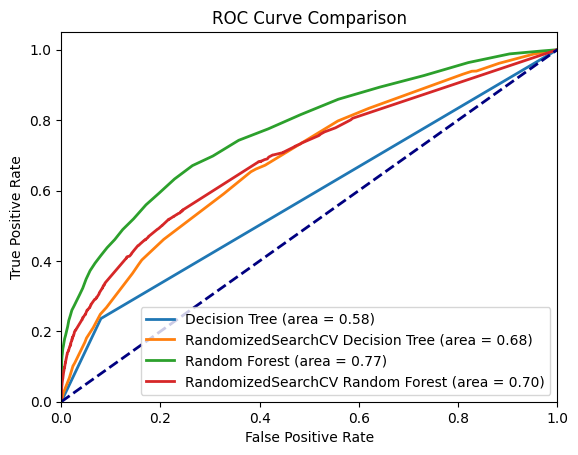

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Optimize memory usage
def optimize_memory_usage(df):
    for col in df.select_dtypes(include=['float']):
        df[col] = pd.to_numeric(df[col], downcast='float', errors='coerce')
    for col in df.select_dtypes(include=['int']):
        df[col] = pd.to_numeric(df[col], downcast='integer', errors='coerce')
    for col in df.select_dtypes(include=['object']):
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Clean data sets
def clean_data(df):
    df = df.replace('x', '', regex=True)
    return df

# Encode categorical columns
def encode_categorical_columns(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        try:
            df[col] = le.fit_transform(df[col])
        except:
            df[col] = df[col].astype('category').cat.codes
    return df

# Drop columns with all NaN values and handle missing data with iterative imputation
def drop_and_impute(df):
    df = df.dropna(axis=1, how='all')
    imputer = IterativeImputer()
    imputed_array = imputer.fit_transform(df)
    imputed_df = pd.DataFrame(imputed_array, columns=df.columns)
    print(f"Missing values after imputation: {imputed_df.isna().sum().sum()}")
    return imputed_df

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot ROC curve for all models in one plot
def plot_roc_comparison(models_results):
    plt.figure()
    for model_name, (fpr, tpr, auc_score) in models_results.items():
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc='lower right')
    plt.show()

# Decision Tree and Random Forest comparison
def model_comparison(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = {}
    roc_results = {}  # To store ROC details for comparison

    try:
        # Basic Decision Tree
        dt = DecisionTreeClassifier(random_state=42)
        dt.fit(X_train, y_train)
        y_pred_dt = dt.predict(X_test)
        accuracy_dt = accuracy_score(y_test, y_pred_dt)
        report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
        fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
        auc_dt = auc(fpr_dt, tpr_dt)
        results['Decision Tree'] = {
            'Accuracy': accuracy_dt,
            'Precision': report_dt['1']['precision'] if '1' in report_dt else 'N/A',
            'Recall': report_dt['1']['recall'] if '1' in report_dt else 'N/A',
            'F1 Score': report_dt['1']['f1-score'] if '1' in report_dt else 'N/A'
        }
        roc_results['Decision Tree'] = (fpr_dt, tpr_dt, auc_dt)

        # Randomized Search CV for Decision Tree
        param_dist_dt = {
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
        rand_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist_dt, n_iter=10, cv=5, random_state=42, n_jobs=1, verbose=2)
        rand_search_dt.fit(X_train, y_train)
        y_pred_rand_dt = rand_search_dt.predict(X_test)
        accuracy_rand_dt = accuracy_score(y_test, y_pred_rand_dt)
        report_rand_dt = classification_report(y_test, y_pred_rand_dt, output_dict=True)
        fpr_rand_dt, tpr_rand_dt, _ = roc_curve(y_test, rand_search_dt.predict_proba(X_test)[:, 1])
        auc_rand_dt = auc(fpr_rand_dt, tpr_rand_dt)
        results['RandomizedSearchCV Decision Tree'] = {
            'Accuracy': accuracy_rand_dt,
            'Precision': report_rand_dt['1']['precision'] if '1' in report_rand_dt else 'N/A',
            'Recall': report_rand_dt['1']['recall'] if '1' in report_rand_dt else 'N/A',
            'F1 Score': report_rand_dt['1']['f1-score'] if '1' in report_rand_dt else 'N/A'
        }
        roc_results['RandomizedSearchCV Decision Tree'] = (fpr_rand_dt, tpr_rand_dt, auc_rand_dt)

        # Basic Random Forest
        rf = RandomForestClassifier(random_state=42, n_jobs=1)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
        fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
        auc_rf = auc(fpr_rf, tpr_rf)
        results['Random Forest'] = {
            'Accuracy': accuracy_rf,
            'Precision': report_rf['1']['precision'] if '1' in report_rf else 'N/A',
            'Recall': report_rf['1']['recall'] if '1' in report_rf else 'N/A',
            'F1 Score': report_rf['1']['f1-score'] if '1' in report_rf else 'N/A'
        }
        roc_results['Random Forest'] = (fpr_rf, tpr_rf, auc_rf)

        # Randomized Search CV for Random Forest
        param_dist_rf = {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
        rand_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=10, cv=5, random_state=42, n_jobs=1, verbose=2)
        rand_search_rf.fit(X_train, y_train)
        y_pred_rand_rf = rand_search_rf.predict(X_test)
        accuracy_rand_rf = accuracy_score(y_test, y_pred_rand_rf)
        report_rand_rf = classification_report(y_test, y_pred_rand_rf, output_dict=True)
        fpr_rand_rf, tpr_rand_rf, _ = roc_curve(y_test, rand_search_rf.predict_proba(X_test)[:, 1])
        auc_rand_rf = auc(fpr_rand_rf, tpr_rand_rf)
        results['RandomizedSearchCV Random Forest'] = {
            'Accuracy': accuracy_rand_rf,
            'Precision': report_rand_rf['1']['precision'] if '1' in report_rand_rf else 'N/A',
            'Recall': report_rand_rf['1']['recall'] if '1' in report_rand_rf else 'N/A',
            'F1 Score': report_rand_rf['1']['f1-score'] if '1' in report_rand_rf else 'N/A'
        }
        roc_results['RandomizedSearchCV Random Forest'] = (fpr_rand_rf, tpr_rand_rf, auc_rand_rf)

    except Exception as e:
        print("Error during model comparison:", e)

    return results, roc_results

# Load and preprocess data
df = pd.read_csv('AutoCredit.csv', low_memory=False)
df = clean_data(df)
df = encode_categorical_columns(df)
df = optimize_memory_usage(df)

# Feature and target split
X = df.drop(columns=['Default'])
y = df['Default']

# Model comparison
results, roc_results = model_comparison(X, y)

# Print accuracy comparison
accuracy_df = pd.DataFrame(results).T
print("Model Accuracy Comparison:")
print(accuracy_df)

# Plot ROC comparison
plot_roc_comparison(roc_results)
